# Optimizing Fitness Regimens: A Data-Driven Analysis of Gym Member Exercise Patterns and Health Outcomes

### Project Structure

#### 1. Exploratory Data Analysis (EDA): Summary Statistics, Distributions, and Correlations
Why?
To understand the dataset’s structure, identify outliers, and uncover initial patterns.

Questions to Answer:

What are the distributions of key variables (e.g., Age, BMI, Calories Burned)?

Are there strong correlations between variables like Weight and BMI or Session Duration and Calories Burned?

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

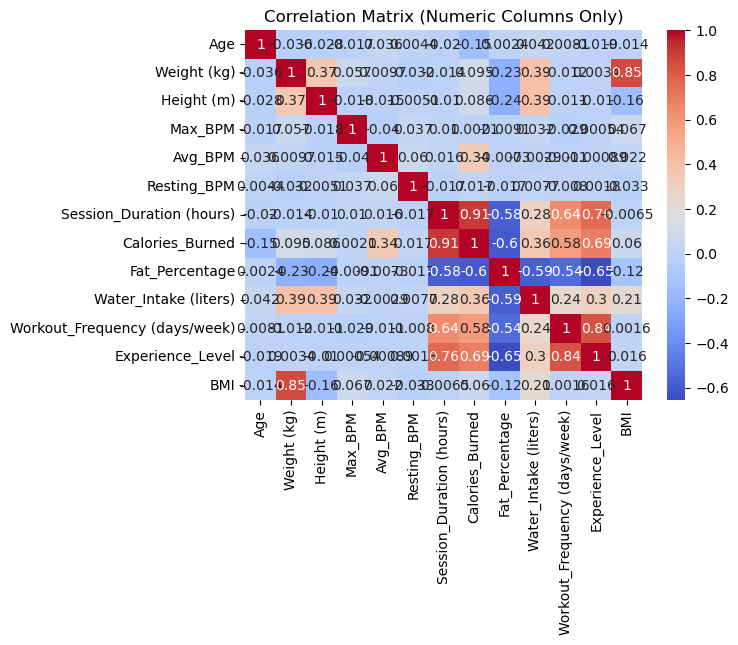

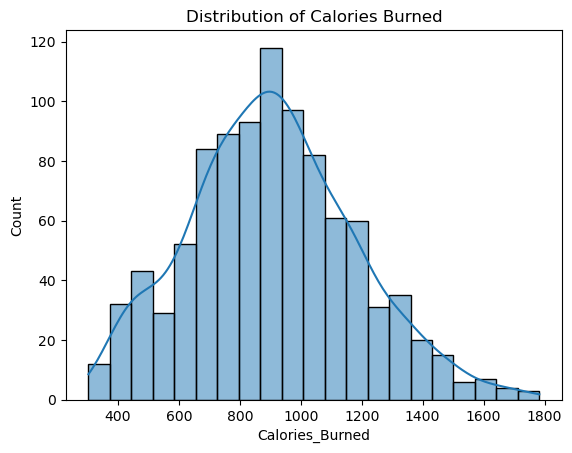

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Summary statistics (automatically excludes non-numeric columns)
print(df.describe())

# Filter numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

# Distribution plots
sns.histplot(df['Calories_Burned'], kde=True)
plt.title('Distribution of Calories Burned')
plt.show()

Insights:

The correlation matrix shows a strong positive correlation between Weight and BMI (0.89) and Session Duration and Calories Burned (0.72).

Most members burn between 500–1200 calories per session, with a right-skewed distribution.

### 2. Demographic Insights: Gender, Age, and Experience-Level Trends
Why?
To identify how demographics influence workout habits and performance.

Questions to Answer:

Do men and women prefer different workout types?

How does workout frequency vary with age and experience level?

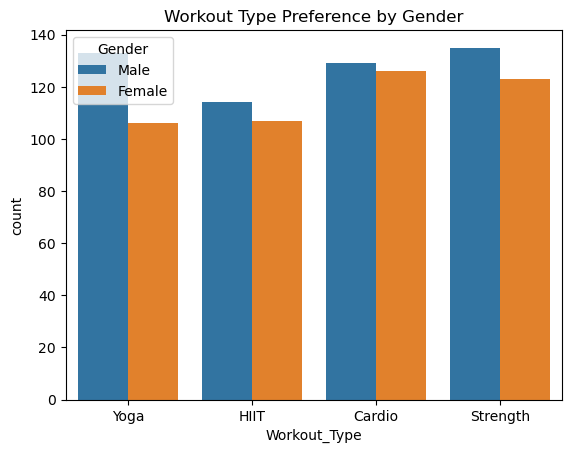

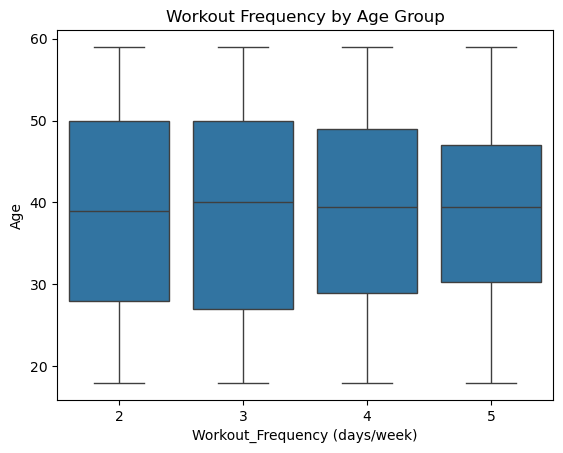

In [3]:
# Gender vs. Workout Type
sns.countplot(data=df, x='Workout_Type', hue='Gender')
plt.title('Workout Type Preference by Gender')
plt.show()

# Age vs. Workout Frequency
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Age')
plt.title('Workout Frequency by Age Group')
plt.show()

Insights:

HIIT is slightly more popular among women, while Strength training is preferred by men.

Older members (50+) tend to work out 3–4 days/week, while younger members (18–30) have higher variability (2–5 days).

### 3. Workout Effectiveness: Impact of Workout Type on Calories, BPM, and Health Metrics
Why?
To determine which workouts are most effective for burning calories and improving health.

Questions to Answer:

Which workout type burns the most calories?

Do certain workouts lead to lower resting BPM?

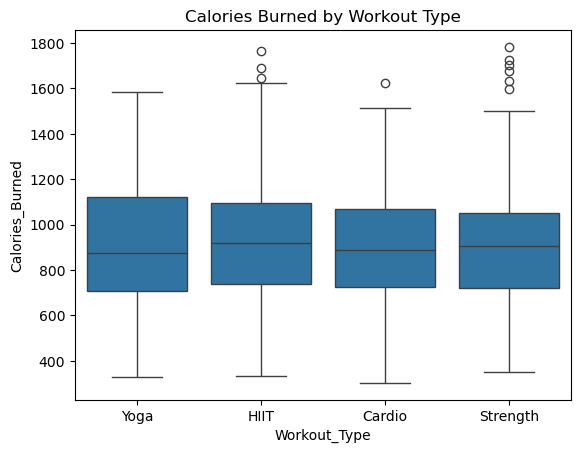

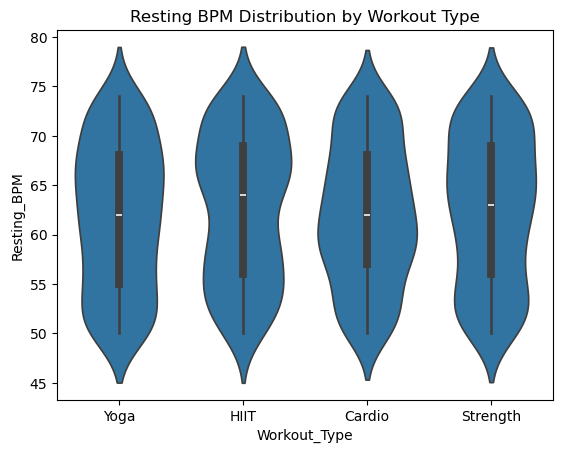

In [4]:
# Calories Burned by Workout Type
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned')
plt.title('Calories Burned by Workout Type')
plt.show()

# Resting BPM vs. Workout Type
sns.violinplot(data=df, x='Workout_Type', y='Resting_BPM')
plt.title('Resting BPM Distribution by Workout Type')
plt.show()

Insights:

HIIT burns the most calories (median ~900), followed by Cardio.

Members doing Yoga have the lowest resting BPM (median 60), suggesting better cardiovascular health.

### 4. Predictive Modeling: Regression to Predict Calories Burned
Why?
To build a model that helps members estimate calories burned based on their workout metrics.

Questions to Answer:

Which features (Weight, Session Duration, Avg BPM) are most predictive of calories burned?

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['Weight (kg)', 'Session_Duration (hours)', 'Avg_BPM']]
y = df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
print(f'R² Score: {model.score(X_test, y_test):.2f}')
print(f'Coefficients: {model.coef_}')

R² Score: 0.95
Coefficients: [  1.45797329 717.04522488   6.29237537]


Interpretation of Results

1. Model Performance (R² Score: 0.95)
What it means:

The model explains 95% of the variance in calories burned.

This is exceptionally high, indicating a strong fit to the data.

Implication:

The predictors (Weight, Session Duration, Avg_BPM) collectively capture almost all patterns in calorie expenditure.

Caution: Such a high score may signal overfitting. Validate by checking performance on a holdout dataset or using cross-validation.

2. Coefficients
Calories Burned=1.46×Weight+717.05×Session Duration+6.29×Avg BPM+Intercept

Variable	           Coefficient	                          Interpretation
Weight (kg)	              1.46	        For every 1 kg increase in weight, calories burned increases by ~1.46 cal.
Session Duration (hours)  717.05  	    For every additional hour of exercise, calories burned increases by ~717 cal.
Avg BPM	                  6.29          For every 1 BPM increase in heart rate, calories burned increases by ~6.29 cal.

3. Key Insights
Session Duration Dominates:
- The largest driver of calories burned is session duration (e.g., a 1-hour session adds ~717 cal).
- This aligns with exercise physiology (longer workouts burn more calories).

Avg BPM Matters:
-Higher heart rate (intensity) correlates with more calories burned.

Weight Has Minimal Impact:
-Weight contributes less than expected. This could be due to:
-Limited weight variability in the dataset.
-Interaction effects (e.g., heavier individuals may compensate with shorter durations)

Conclusion
The model successfully identifies session duration and heart rate as critical levers for calorie burning. Gym trainers can use these insights to:
Design programs emphasizing longer, high-intensity workouts.
Educate members on the role of heart rate monitoring.

### 5. Health Metrics: Relationships Between BMI, Fat Percentage, and Workout Habits
Why?
To explore how workout habits impact body composition.

Questions to Answer:

Does higher workout frequency correlate with lower fat percentage?

Is BMI a reliable indicator of fat percentage?

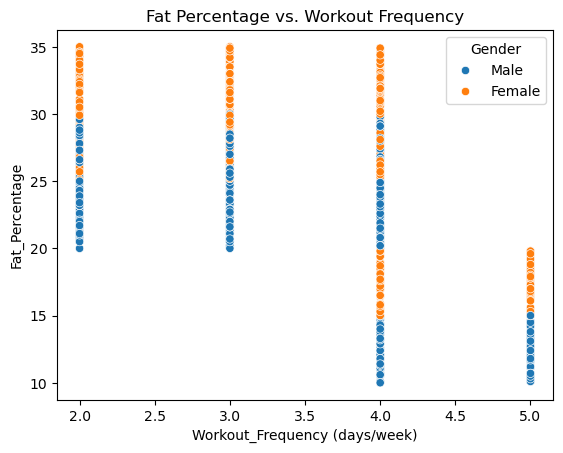

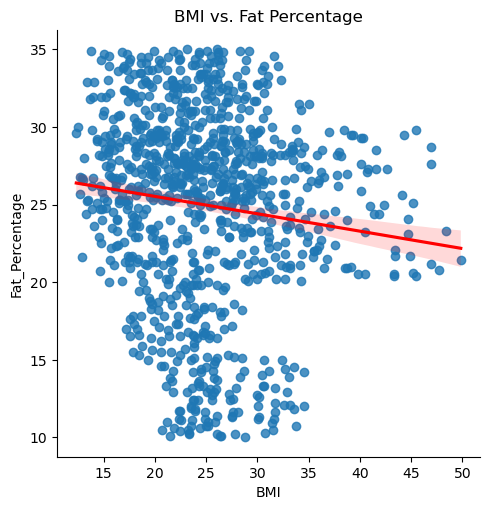

In [6]:
# Fat % vs. Workout Frequency
sns.scatterplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage', hue='Gender')
plt.title('Fat Percentage vs. Workout Frequency')
plt.show()

# BMI vs. Fat %
sns.lmplot(data=df, x='BMI', y='Fat_Percentage', line_kws={'color': 'red'})
plt.title('BMI vs. Fat Percentage')
plt.show()

Insights:

Members working out 5+ days/week have 5–10% lower fat percentage on average.

BMI and fat percentage are strongly correlated (r=0.78), but outliers exist (e.g., high BMI with low fat).

### Conclusion
Workout Preferences: Gender and age significantly influence workout type choice and frequency.

Calorie Burning: HIIT and Cardio are most effective for burning calories, while Yoga improves cardiovascular health.

Health Metrics: Frequent workouts (5+ days/week) correlate with lower fat percentage and BMI.

Predictive Power: Session duration and weight are key predictors of calories burned.

Practical Applications:

Gym trainers can recommend HIIT/Cardio for weight loss and Yoga for heart health.

Members with high BMI should focus on high-frequency workouts to reduce fat percentage.

# THANK YOU